In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import cv2
import os
%matplotlib inline

In [2]:
img = cv2.imread('OpenCV_coins.jpg')

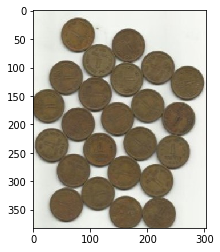

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

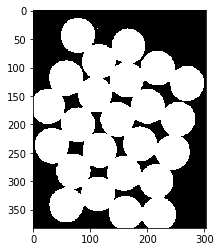

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

In [5]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

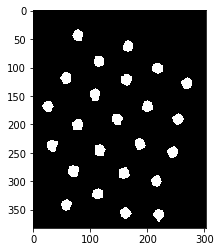

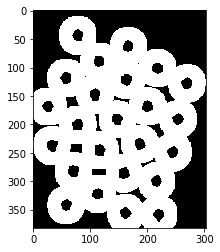

In [6]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)  # option 0, 3 & 5
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(cv2.cvtColor(sure_fg, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(unknown, cv2.COLOR_BGR2RGB))
plt.show()

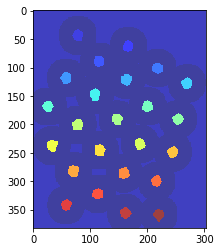

In [7]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers, cmap=cm.jet,alpha=0.75)
plt.show()

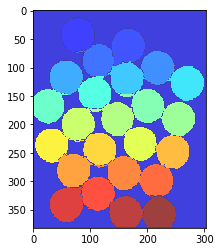

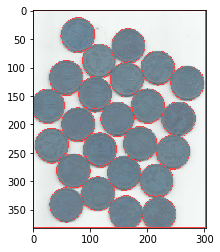

In [8]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers, cmap=cm.jet,alpha=0.75)
plt.show()

plt.imshow(img, cmap=cm.jet,alpha=0.75)
plt.show()

### Result: Successful implemented OpenCV example.